In [2]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Filttering our df 

df = df[df['job_title_short'] == 'Data Analyst']

In [5]:
df_exploded = df.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [6]:
# Now we want to do grouping for the job_skills in order to get the count of these skills
# Also for the salary_year_avg column we need to aggregate for each of these skills the median salary 
# Here we groupby the job_skills and get the count of these skills
# But what we want is not only the counts of these skills but what is their associated median salary
# So, since htere's multiple aggregation functions we need to use that agg( ) method ⬇️⬇️⬇️

df_exploded.groupby('job_skills').size()

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [ ]:
# Skill_count --> is a new column and we're setting it equal to a tuple of two variables 
# To provide the column that we want to do the aggregation on so, here the 'job_skills' column & the agg method of 'count'

df_exploded.groupby('job_skills').agg(
    skill_count =('job_skills', 'count')

)

# Notice: the job_skills is an index Not a regular column

,skill_count
job_skills,
airflow,2002
airtable,88
alteryx,4570
angular,376
angular.js,2
...,...
wrike,39
wsl,16
xamarin,2


In [ ]:
# Here we alos want the median salary so median_salary --> is a new column and we're going to set it equal to tuple of  two variables
# So, here we want to do the agg on the column of 'salary_year_avg' and the agg method which is here it's 'median

df_exploded.groupby('job_skills').agg(
    skill_count =('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)



,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [9]:
# Here we want to save the result into a variable called 'skill_stats' 
# and that's so, we cna get into actually sortin the values of it 

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count =('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

In [ ]:
# Sorting the values by 'skill_count' column in ascending order
# And the final thing to do is that we want to plot on the first 10 skills so we're going to use head(10) method

skill_stats.sort_values(by='skill_count', ascending=False).head(10)



,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [11]:
# Here we're going to set the result inot a New varaible called "the_skills_stats" # Notic: the new variable name is (Plural) skills not skill

the_skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

<Axes: xlabel='skill_count', ylabel='median_salary'>

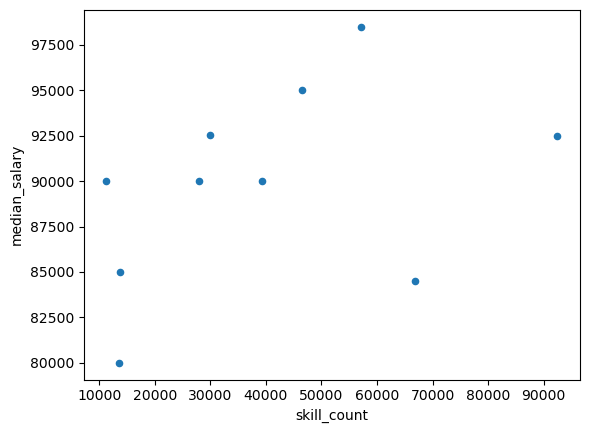

In [12]:
# Now we plot 

the_skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

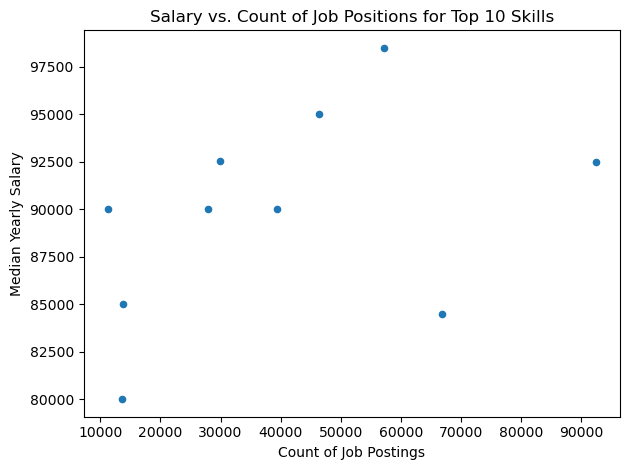

In [ ]:
# Cleaning the plot little bit 

the_skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Positions for Top 10 Skills')
plt.tight_layout()
plt.show()

# As you can see there is no text so, we can't tell which dot represent which skill

In [ ]:
the_skills_stats

# Notice: the job_skills is an index Not a regular column

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [ ]:
# looping throught the 'the_skills_stats' DataFrame 
for i, text in enumerate(the_skills_stats.index): # the job_skills is an index not a regular column
    print(i, text)

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


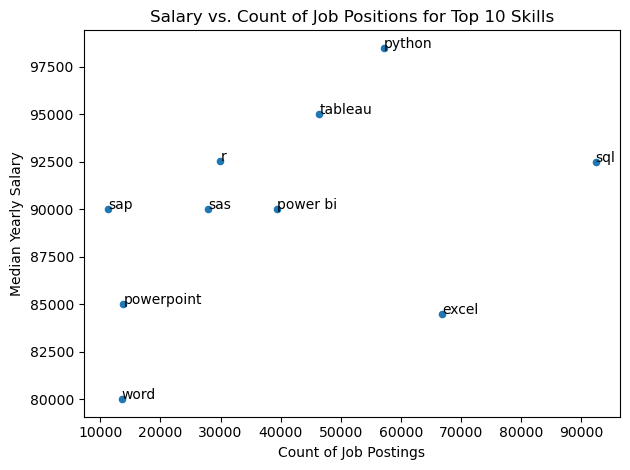

In [21]:
# Using the .text method from matplotlib 

the_skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Positions for Top 10 Skills')
plt.tight_layout()

# plt.text() is a Matplotlib function that adds text at a specific (x, y) coordinate on a plot.
for i, text in enumerate(the_skills_stats.index):
    plt.text(the_skills_stats['skill_count'].iloc[i], # the x coordinate
             the_skills_stats['median_salary'].iloc[i], # the Y coordinate
             text)

plt.show() 